In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100
color = sns.color_palette()
sns.set(style="white")

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

In [32]:
carac = pd.read_csv("../dataset/caracteristics.csv", encoding="latin-1", low_memory=False)
holiday_data = pd.read_csv("../dataset/holidays.csv", low_memory=False)

In [33]:
import datetime
import dateutil.relativedelta

holiday_data["d"] = "0"

for a in range(len(holiday_data["ds"])):

    holiday_data["d"][a] = datetime.datetime.strptime(holiday_data["ds"][a], "%Y-%m-%d") - dateutil.relativedelta.relativedelta(days=1)
    holiday_data["d"][a] = holiday_data["d"][a].strftime("%Y-%m-%d")

In [34]:
carac.info()

## dep, lat, long, adr, com, gps - droppar
## carac = carac.drop(labels=["dep", "lat", "long", "adr", "com", "gps"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
Num_Acc    839985 non-null int64
an         839985 non-null int64
mois       839985 non-null int64
jour       839985 non-null int64
hrmn       839985 non-null int64
lum        839985 non-null int64
agg        839985 non-null int64
int        839985 non-null int64
atm        839930 non-null float64
col        839974 non-null float64
com        839983 non-null float64
adr        699443 non-null object
gps        366226 non-null object
lat        362471 non-null float64
long       362467 non-null object
dep        839985 non-null int64
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB


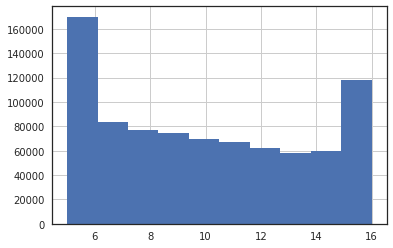

In [24]:
carac['an'].hist()

In [8]:
## tratar os nan do ATM
carac[carac["atm"].isna()] = int(carac["atm"].mode()[0])

In [9]:
## tratar os nan do COL
carac[carac["col"].isna()] = int(carac["col"].mode()[0])

In [10]:
## extrair final de semana / holiday e um dia antes
carac["yymd"] = carac["an"].apply(str)+"-"+carac["mois"].apply(str)+"-"+carac["jour"].apply(str)
carac['yymd'] = pd.to_datetime(carac['yymd'], yearfirst=True)
carac['day_of_week'] = carac['yymd'].dt.weekday_name

In [12]:
carac["day_official_holiday"] = carac['yymd'].isin(holiday_data["d"]).astype(int)
carac["day_official_holiday_minus1"] = carac['yymd'].isin(holiday_data["ds"]).astype(int)

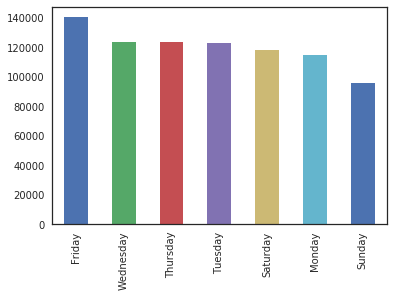

In [13]:
carac["day_of_week"].value_counts().plot(kind="bar")

In [14]:
#is it a holiday?
def h3(x):
    if x == "Monday" or x == "Tuesday" or x == "Wednesday" or x == "Thursday" or x == "Friday":
        return 0
    else:
        return 1

def h4(x):
    if x == "Monday" or x == "Tuesday" or x == "Wednesday" or x == "Thursday":
        return 0
    else:
        return 1

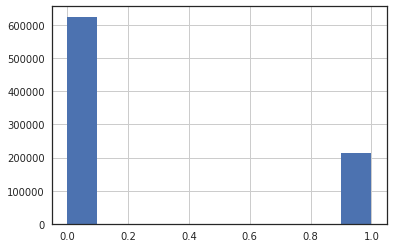

In [15]:
carac["sat_sun"] = carac["day_of_week"].apply(h3)
carac.sat_sun.hist()

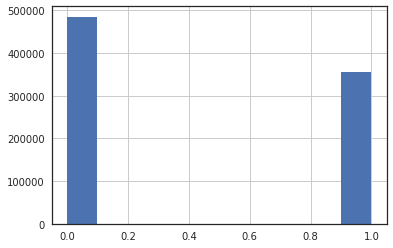

In [16]:
carac["fri_sat_sun"] = carac["day_of_week"].apply(h4)
carac.fri_sat_sun.hist()

In [17]:
carac.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,yymd,day_of_week,day_official_holiday,day_official_holiday_minus1,sat_sun,fri_sat_sun
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,2016-02-01,Monday,0,0,0,0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,2016-03-16,Wednesday,0,0,0,0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,2016-07-13,Wednesday,1,0,0,0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,2016-08-15,Monday,0,1,0,0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,2016-12-23,Friday,0,0,0,1


In [18]:
## ano do acidente - ultimos 4 / primeiros 8
def year(x):
    if x < 12:
        return 0
    else:
        return 1

carac["an"] = carac["an"].apply(year)

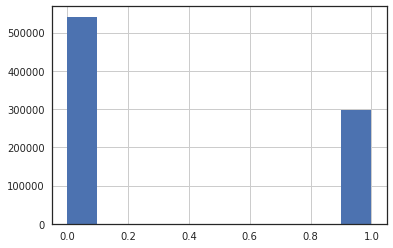

In [19]:
carac["an"].hist()

In [17]:
## horario - pico / dia / noite+madrugada
def timeofday(x):
    if x > 900 and x < 1700:
        return 0
    elif x >= 1700 and x < 2000:
        return 1
    else:
        return 2

carac["hrmn"] = carac["hrmn"].apply(timeofday)

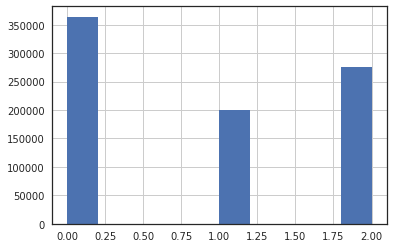

In [18]:
carac["hrmn"].hist()

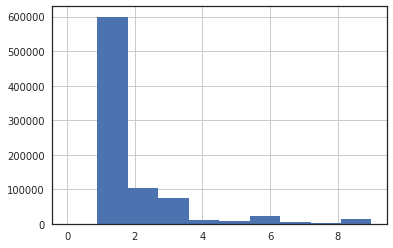

In [19]:
carac["int"].hist()

In [20]:
## int - juntar as intersecções que não são X - quando é X é igual a 0
def intersec(x):
    if x == 1:
        return 1
    else:
        return 0

carac["int"] = carac["int"].apply(intersec)

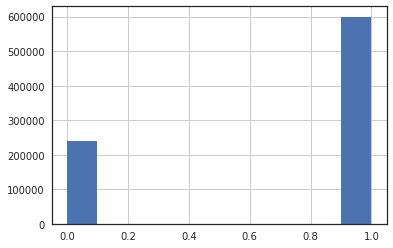

In [21]:
carac["int"].hist()

In [22]:
## lum - luz natural / não tem luz natural
def luminosity(x):
    if x == 1:
        return 1
    else:
        return 0

carac["lum"] = carac["lum"].apply(luminosity)

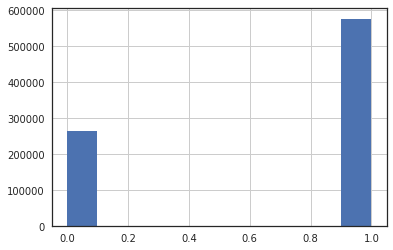

In [23]:
carac["lum"].hist()

In [24]:
## col - com veiculos, outras colisões, sem veículos
def collisions(x):
    if x < 6:
        return 0
    elif x == 6:
        return 1
    else:
        return 2

carac["col"] = carac["col"].apply(collisions)

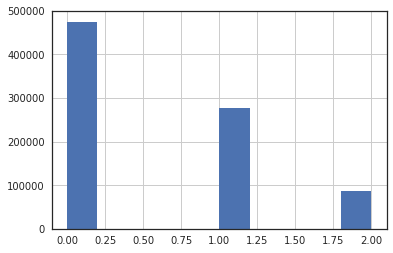

In [25]:
carac["col"].hist()

In [26]:
## atm - com veiculos, outras colisões, sem veículos
def atmosphere(x):
    if x == 1:
        return 1
    else:
        return 0

carac["atm"] = carac["atm"].apply(atmosphere)

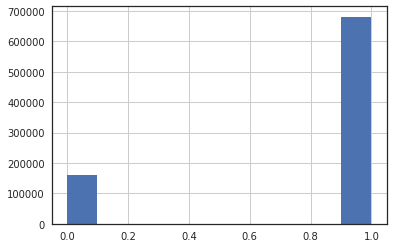

In [27]:
carac["atm"].hist()

In [26]:
carac["sun_sat_hol_holminus1"] = 0

for i in range(len(carac)):
    if carac["day_official_holiday"][i] == 1 or carac["day_official_holiday_minus1"][i] == 1 or carac["sat_sun"][i] == 1:
        carac["sun_sat_hol_holminus1"][i] = 1
    else:
        carac["sun_sat_hol_holminus1"][i] = 0

KeyError: 'day_official_holiday'

In [25]:
carac["sun_sat_hol_holminus1"].hist()

KeyError: 'sun_sat_hol_holminus1'

In [29]:
def friday(x):
    if x == "Friday":
        return 0
    else:
        return 1

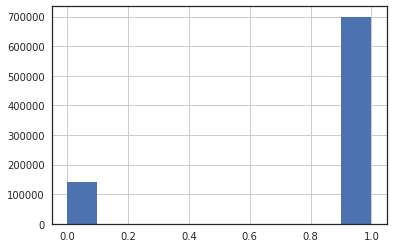

In [30]:
carac["friday"] = carac["day_of_week"].apply(friday)
carac.friday.hist()

In [31]:
carac.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,yymd,day_of_week,day_official_holiday,day_official_holiday_minus1,sat_sun,fri_sat_sun,sun_sat_hol_holminus1,friday
0,201600000001,1,2,1,0,1,2,1,0,0,2016-02-01,Monday,0,0,0,0,0,1
1,201600000002,1,3,16,1,1,2,0,1,1,2016-03-16,Wednesday,0,0,0,0,0,1
2,201600000003,1,7,13,1,1,1,1,1,1,2016-07-13,Wednesday,1,0,0,0,1,1
3,201600000004,1,8,15,1,0,2,1,0,0,2016-08-15,Monday,0,1,0,0,1,1
4,201600000005,1,12,23,0,1,2,0,1,0,2016-12-23,Friday,0,0,0,1,0,0


In [32]:
new_carac = carac.drop(labels=["mois", "jour", "yymd", "day_of_week", "day_official_holiday", "day_official_holiday_minus1", "sat_sun", "fri_sat_sun"], axis=1)

In [33]:
new_carac

,Num_Acc,an,hrmn,lum,agg,int,atm,col,sun_sat_hol_holminus1,friday
0,201600000001,1,0,1,2,1,0,0,0,1
1,201600000002,1,1,1,2,0,1,1,0,1
2,201600000003,1,1,1,1,1,1,1,1,1
3,201600000004,1,1,0,2,1,0,0,1,1
4,201600000005,1,0,1,2,0,1,0,0,0
5,201600000006,1,0,1,2,1,0,1,0,0
6,201600000007,1,0,1,2,1,0,0,1,1
7,201600000008,1,1,0,1,1,1,0,1,1
8,201600000009,1,1,1,2,1,1,0,0,0
9,201600000010,1,0,1,1,1,0,1,0,0


In [34]:
#new_carac.to_csv("caracteristics_done.csv")

In [ ]:
new_carac.an.hist()